## РАЗДЕЛ ВИЗУАЛИЗАЦИИ ЗАПРОСОВ SQL


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
import matplotlib.pyplot as plt
print(plt.style.available)



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [45]:
sns.set_style("darkgrid")    # стиль графиков
sns.set_context("notebook")  # масштаб и шрифты
sns.set(font_scale=1.1)      # размер шрифта


In [55]:
titanic_df = pd.read_csv("C:\\Users\\Акылай\\OneDrive\\Desktop\\my git\\titanic\\data\\dbeaver/titanic.csv")
purchases_df = pd.read_csv("C:\\Users\\Акылай\\OneDrive\\Desktop\\my git\\titanic\\data\\dbeaver/purchases.csv")
lifeboat_assignments_df = pd.read_csv("C:\\Users\\Акылай\\OneDrive\\Desktop\\my git\\titanic\\data\\dbeaver/lifeboat_assignments.csv")

In [56]:
total_passengers = len(titanic_df)
print("Всего пассажиров:", total_passengers)

Всего пассажиров: 891


In [58]:
survival_counts = titanic_df['Survived'].value_counts()
print("\nВыжившие/Погибшие:\n", survival_counts)


Выжившие/Погибшие:
 Survived
0    549
1    342
Name: count, dtype: int64


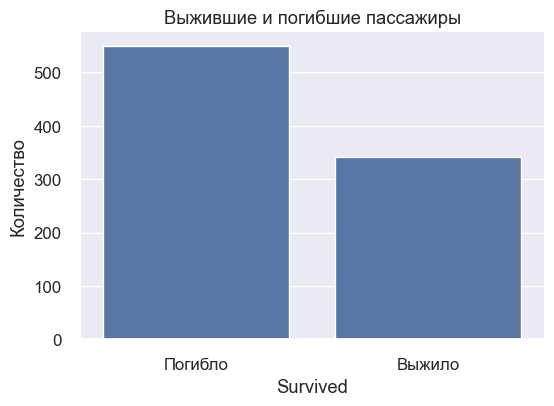

In [59]:
plt.figure(figsize=(6,4))
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.xticks([0,1], ['Погибло','Выжило'])
plt.title("Выжившие и погибшие пассажиры")
plt.ylabel("Количество")
plt.show()


### Мы можем видеть, что погибло людей больше, чем выжило


In [60]:
null_counts = titanic_df.isnull().sum()
print("\nПропуски по колонкам:\n", null_counts)
most_null = null_counts.idxmax()
print("Больше всего пропусков в поле:", most_null)



Пропуски по колонкам:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Больше всего пропусков в поле: Cabin


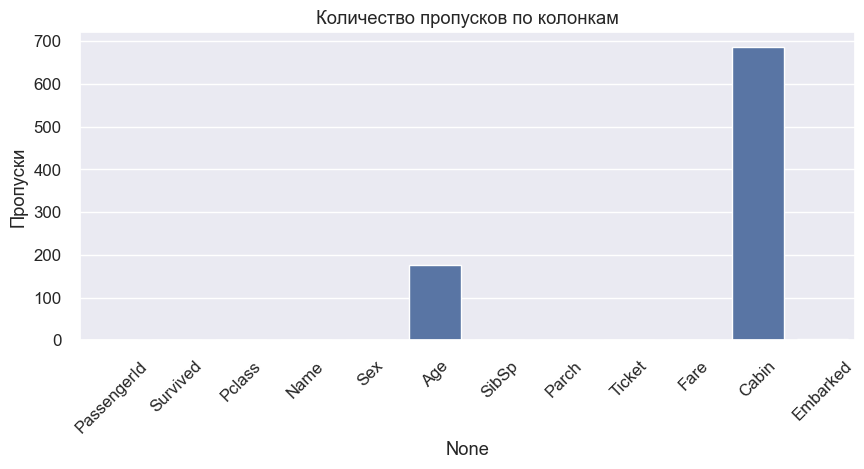

In [74]:
plt.figure(figsize=(10,4))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=45)
plt.title("Количество пропусков по колонкам")
plt.ylabel("Пропуски")
plt.show()


In [61]:
no_purchases = titanic_df[~titanic_df['PassengerId'].isin(purchases_df['PassengerId'])]
print("\nПассажиров без покупок:", len(no_purchases))


Пассажиров без покупок: 12


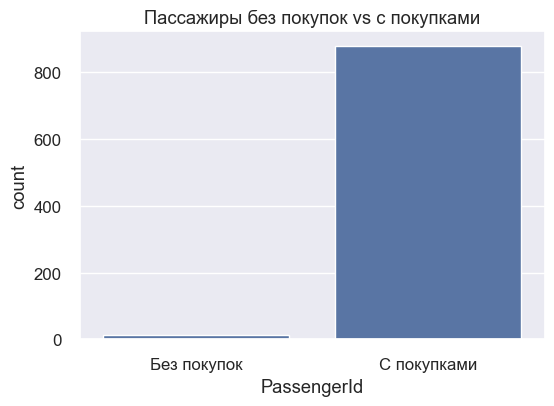

In [75]:
plt.figure(figsize=(6,4))
sns.countplot(data=titanic_df, x=titanic_df['PassengerId'].isin(purchases_df['PassengerId']))
plt.xticks([0,1], ['Без покупок','С покупками'])
plt.title("Пассажиры без покупок vs с покупками")
plt.show()


In [62]:
category_stats = purchases_df.groupby('category')['amount'].agg(['count','sum']).reset_index()
print("\nПокупки по категориям:\n", category_stats)


Покупки по категориям:
         category  count       sum
0        alcohol    336   2389.50
1  extra_service    337   2664.50
2           food    698   2619.21
3          other   1736  10263.47


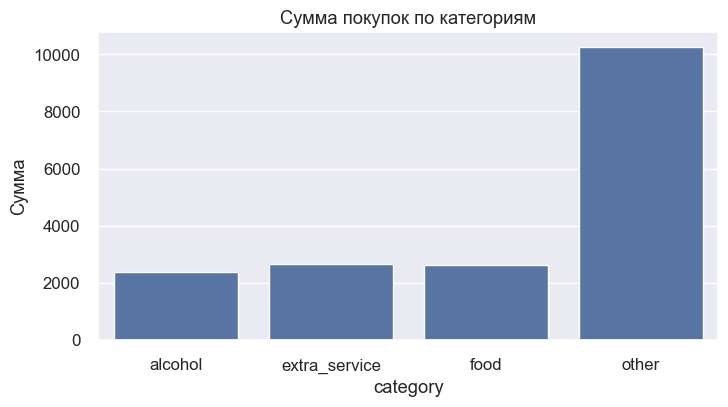

In [76]:
category_stats = purchases_df.groupby('category')['amount'].agg(['count','sum']).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=category_stats, x='category', y='sum')
plt.title("Сумма покупок по категориям")
plt.ylabel("Сумма")
plt.show()

In [68]:
passenger_stats = purchases_df.groupby('PassengerId')['amount'].agg(['mean','median']).reset_index()
passenger_stats.rename(columns={'mean':'avg_spend','median':'median_spend'}, inplace=True)
print("\nСредний и медианный чек (первые 5 пассажиров):\n", passenger_stats.head())



Средний и медианный чек (первые 5 пассажиров):
    PassengerId  avg_spend  median_spend
0            1   5.795000         5.795
1            2   3.205000         3.205
2            3   5.063333         2.740
3            4   4.660000         4.660
4            5   6.408000         5.440


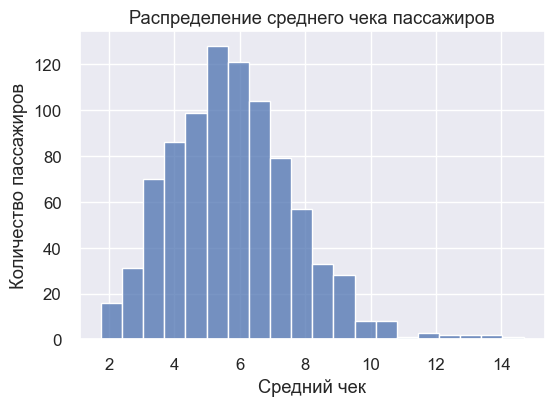

In [77]:
plt.figure(figsize=(6,4))
sns.histplot(passenger_stats['avg_spend'], bins=20)
plt.title("Распределение среднего чека пассажиров")
plt.xlabel("Средний чек")
plt.ylabel("Количество пассажиров")
plt.show()

In [69]:
pclass_spend = purchases_df.merge(titanic_df[['PassengerId','Pclass']], on='PassengerId', how='left')
pclass_summary = pclass_spend.groupby('Pclass')['amount'].sum()
print("\nСумма покупок по Pclass:\n", pclass_summary)


Сумма покупок по Pclass:
 Pclass
1     4196.30
2     3675.01
3    10065.37
Name: amount, dtype: float64


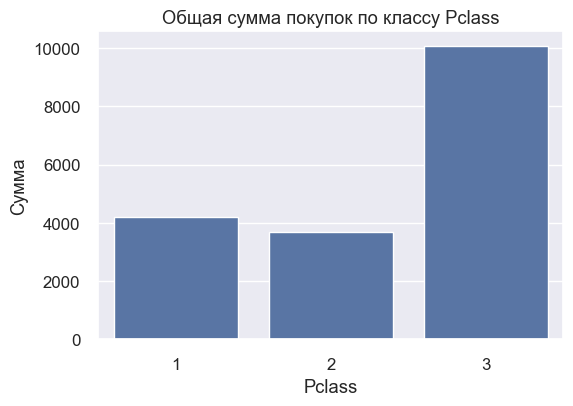

In [79]:
pclass_spend = purchases_df.merge(titanic_df[['PassengerId','Pclass']], on='PassengerId', how='left')
pclass_summary = pclass_spend.groupby('Pclass')['amount'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=pclass_summary, x='Pclass', y='amount')
plt.title("Общая сумма покупок по классу Pclass")
plt.ylabel("Сумма")
plt.show()

In [71]:
survivors_no_purchases = no_purchases[no_purchases['Survived']==1]
print("\nВыживших без покупок:", len(survivors_no_purchases))


Выживших без покупок: 5


In [73]:
alcohol_buyers = purchases_df[purchases_df['category']=='alcohol']['PassengerId'].unique()
survived_alcohol = titanic_df[titanic_df['PassengerId'].isin(alcohol_buyers)]['Survived'].mean()
survived_no_alcohol = titanic_df[~titanic_df['PassengerId'].isin(alcohol_buyers)]['Survived'].mean()
print("\nДоля выживших (покупали алкоголь):", round(survived_alcohol,2))
print("Доля выживших (не покупали алкоголь):", round(survived_no_alcohol,2))


Доля выживших (покупали алкоголь): 0.39
Доля выживших (не покупали алкоголь): 0.38


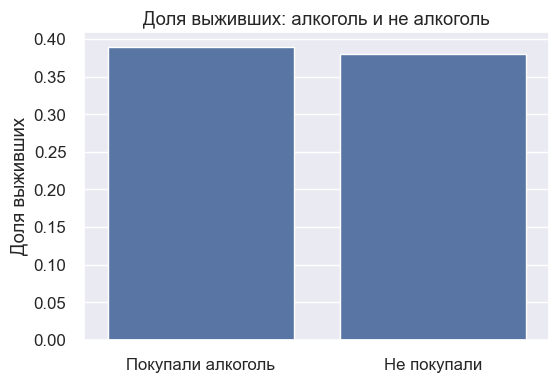

In [82]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Покупали алкоголь','Не покупали'], y=[survived_alcohol,survived_no_alcohol])
plt.title("Доля выживших: алкоголь и не алкоголь")
plt.ylabel("Доля выживших")
plt.show()

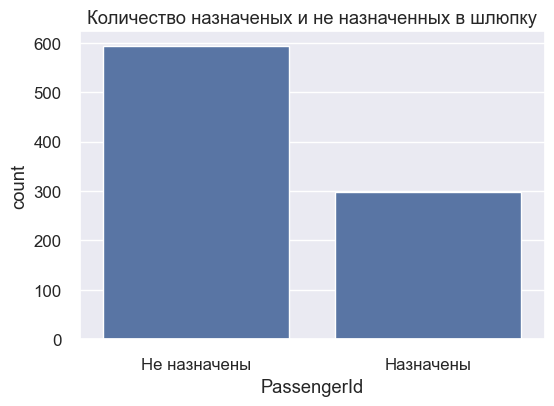

In [84]:
assigned_ids = lifeboat_assignments_df['PassengerId']
plt.figure(figsize=(6,4))
sns.countplot(x=titanic_df['PassengerId'].isin(assigned_ids))
plt.xticks([0,1], ['Не назначены','Назначены'])
plt.title("Количество назначеных и не назначенных в шлюпку")
plt.show()

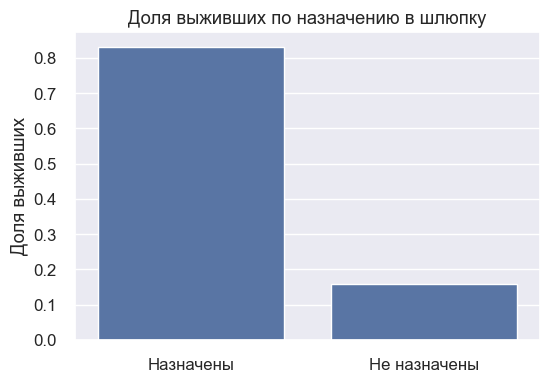

In [86]:
surv_assigned = titanic_df[titanic_df['PassengerId'].isin(assigned_ids)]['Survived'].mean()
surv_not_assigned = titanic_df[~titanic_df['PassengerId'].isin(assigned_ids)]['Survived'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=['Назначены','Не назначены'], y=[surv_assigned,surv_not_assigned])
plt.title("Доля выживших по назначению в шлюпку")
plt.ylabel("Доля выживших")
plt.show()

In [89]:
total_spend = purchases_df.groupby('PassengerId')['amount'].sum().reset_index()
total_spend.rename(columns={'amount':'total_spend'}, inplace=True)
def spend_segment(x):
    if x==0: return 'no_spend'
    elif x<=10: return 'low_spend'
    elif x<=30: return 'medium_spend'
    else: return 'high_spend'
total_spend['spend_segment'] = total_spend['total_spend'].apply(spend_segment)

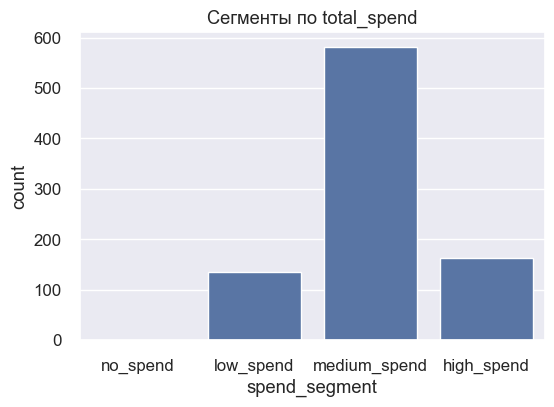

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(x='spend_segment', data=total_spend, order=['no_spend','low_spend','medium_spend','high_spend'])
plt.title("Сегменты по total_spend")
plt.show()

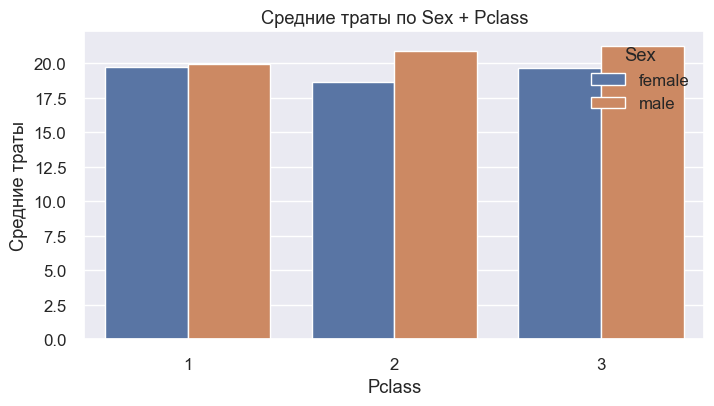

In [91]:
merged = total_spend.merge(titanic_df[['PassengerId','Sex','Pclass']], on='PassengerId', how='left')
avg_by_group = merged.groupby(['Sex','Pclass'])['total_spend'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='Pclass', y='total_spend', hue='Sex', data=avg_by_group)
plt.title("Средние траты по Sex + Pclass")
plt.ylabel("Средние траты")
plt.show()

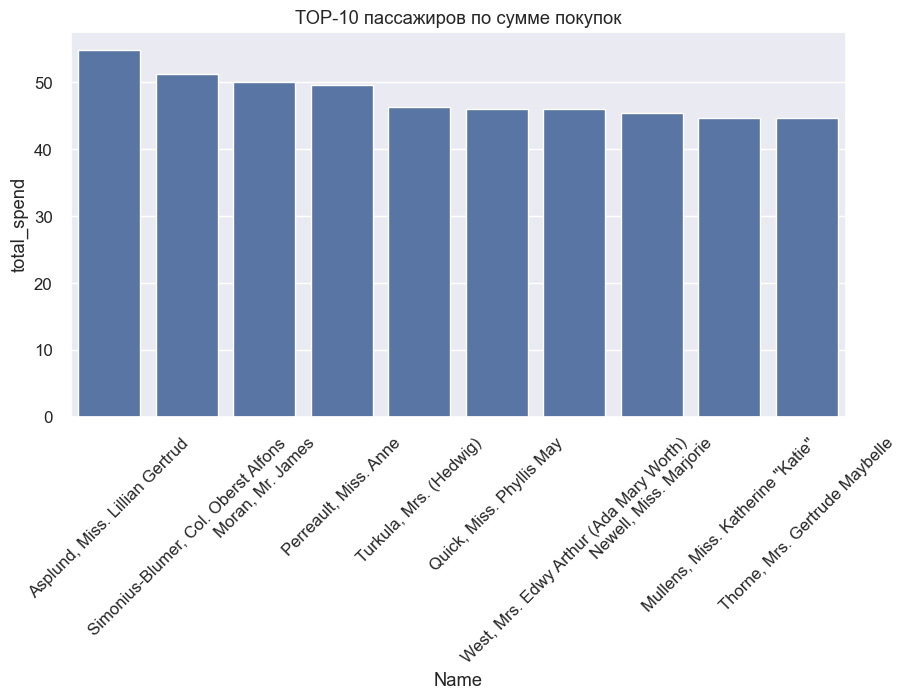

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(x='Name', y='total_spend', data=top10)
plt.xticks(rotation=45)
plt.title("TOP-10 пассажиров по сумме покупок")
plt.show()

In [103]:
bad_purchases = purchases_df[purchases_df['amount'] <= 0]
print("Покупки с нулевой или отрицательной суммой:\n", bad_purchases)

Покупки с нулевой или отрицательной суммой:
 Empty DataFrame
Columns: [purchase_id, PassengerId, purchased_at, category, item, qty, amount]
Index: []


In [104]:
pids_in_titanic = titanic_df['PassengerId'].unique()
missing_passengers = purchases_df[~purchases_df['PassengerId'].isin(pids_in_titanic)]
print("Пассажиры с покупками, но отсутствующие в Titanic:\n", missing_passengers)

Пассажиры с покупками, но отсутствующие в Titanic:
 Empty DataFrame
Columns: [purchase_id, PassengerId, purchased_at, category, item, qty, amount]
Index: []
